In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(font_scale=1.6)
itcDIR = '../../data/gemini_FT_6-2016/itc_results/'

15


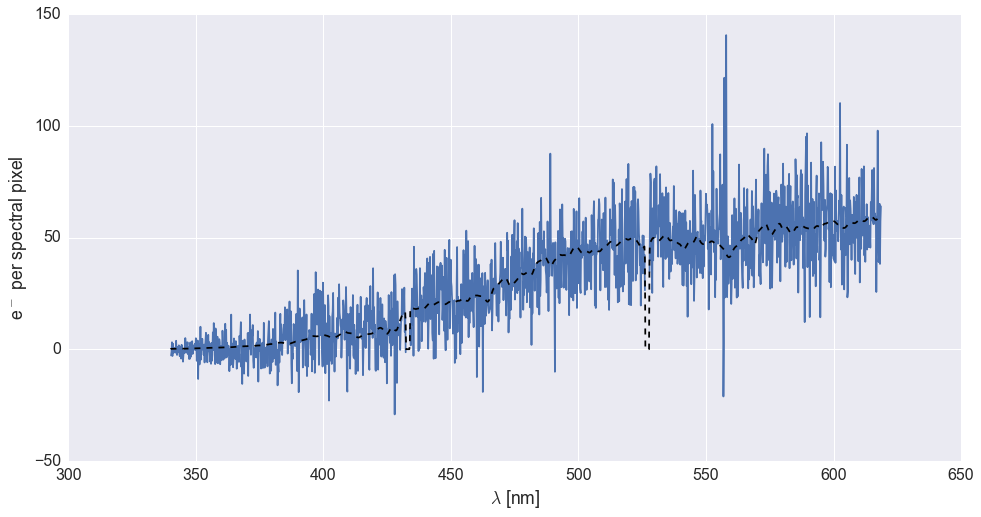

In [2]:
udg = '2'
num_exp = {'1':9, '2':5}[udg]
seed = 15 #np.random.randint(100)
print(seed)
fig, ax = plt.subplots(figsize=(16,8))
lam, signal = np.loadtxt(itcDIR+'udg_'+udg+'_itc_signal_single_exp.dat', unpack=True)
snr = np.loadtxt(itcDIR+'udg_'+udg+'_itc_final_snr.dat', usecols=(1,))
snr_single = np.loadtxt(itcDIR+'udg_'+udg+'_itc_single_exp_snr.dat', usecols=(1,))
bckgrd = np.loadtxt(itcDIR+'udg_'+udg+'_itc_bckgrd.dat', usecols=(1,))
tot_sig = num_exp*signal
noise = tot_sig/snr
noisy_signal = tot_sig + noise*np.random.randn(noise.size)
ax.plot(lam, noisy_signal)
ax.plot(lam, tot_sig, 'k--')
ax.set_ylim(-50,150)
ax.set(xlabel='$\lambda$ [nm]', ylabel='e$^-$ per spectral pixel');

### UDG-1 seed = 33, UDG-2 seed = 15

In [3]:
not_nan = ~np.isnan(noisy_signal)
out = np.vstack([lam[not_nan]*10, noisy_signal[not_nan], noise[not_nan], tot_sig[not_nan]]).T
np.savetxt('/Users/protostar/Desktop/UDG-'+udg+'_mock_spec.dat', out,fmt='%g',
           header='lambda (A), noisy signal, noise, noiseless signal (all e^- per spectral pixel)')